In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load the processed features data
features_path = 'processed_data_labeled.xlsx'  
features_df = pd.read_excel(features_path, sheet_name='Features')
synthetic_labels = np.random.choice([0, 1], size=len(features_df))
synthetic_labels_df = pd.DataFrame(synthetic_labels, columns=["COPD"])

# Save synthetic labels to CSV if needed
synthetic_labels_path = 'labels.csv'  
synthetic_labels_df.to_csv(synthetic_labels_path, index=False)

# Step 2: Data Preparation
X = features_df.values
y = synthetic_labels_df.values.ravel()

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and Evaluate the SVM Model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.53125
ROC AUC: 0.4624160025003907

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.67      0.59        81
           1       0.53      0.39      0.45        79

    accuracy                           0.53       160
   macro avg       0.53      0.53      0.52       160
weighted avg       0.53      0.53      0.52       160



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load the processed features data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
features_df = pd.read_excel(features_path, sheet_name='Features')

# Step 1: Generate synthetic labels
# Assuming binary labels: 1 for COPD and 0 for no COPD
synthetic_labels = np.random.choice([0, 1], size=len(features_df))
synthetic_labels_df = pd.DataFrame(synthetic_labels, columns=["COPD"])

# Save synthetic labels to CSV if needed
synthetic_labels_path = 'labels.csv'  # Update path if necessary
synthetic_labels_df.to_csv(synthetic_labels_path, index=False)

# Step 2: Data Preparation
X = features_df.values
y = synthetic_labels_df.values.ravel()

# Handle missing values in the features with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (optional for Random Forest, but can improve performance slightly)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and Evaluate the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.5
ROC AUC: 0.5113352095059411

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.59      0.55        82
           1       0.48      0.41      0.44        78

    accuracy                           0.50       160
   macro avg       0.50      0.50      0.49       160
weighted avg       0.50      0.50      0.50       160



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load the processed features data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
features_df = pd.read_excel(features_path, sheet_name='Features')

# Step 1: Generate synthetic labels
# Assuming binary labels: 1 for COPD and 0 for no COPD
synthetic_labels = np.random.choice([0, 1], size=len(features_df))
synthetic_labels_df = pd.DataFrame(synthetic_labels, columns=["COPD"])

# Save synthetic labels to CSV if needed
synthetic_labels_path = 'labels.csv'  # Update path if necessary
synthetic_labels_df.to_csv(synthetic_labels_path, index=False)

# Step 2: Data Preparation
X = features_df.values
y = synthetic_labels_df.values.ravel()

# Handle missing values in the features with mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (optional for XGBoost, which handles unscaled data well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train and Evaluate the XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_rep)


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.475
ROC AUC: 0.459134239724957

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.43      0.45        79
           1       0.48      0.52      0.50        81

    accuracy                           0.48       160
   macro avg       0.47      0.47      0.47       160
weighted avg       0.47      0.47      0.47       160



In [ ]:
import pandas as pd
import numpy as np
gss_path = 'gss.csv'    
kdei_path = 'kdei.csv'   
labels_path = 'labels.csv' 

gss_df = pd.read_csv(gss_path, header=None)
kdei_df = pd.read_csv(kdei_path, header=None)



gss_features = pd.DataFrame([
    [float(x) for x in row.split(',')]
    for row in gss_df[1].dropna()
])

kdei_features = pd.DataFrame([
    [float(x) for x in row.split(',')]
    for row in kdei_df[1].dropna()
])

gss_features.columns = [f'GSS_Feature_{i+1}' for i in range(gss_features.shape[1])]
kdei_features.columns = [f'KDEI_Feature_{i+1}' for i in range(kdei_features.shape[1])]

# Combine the GSS and KDEI features
features_df = pd.concat([gss_features, kdei_features], axis=1)

features_df.replace([np.inf, -np.inf], np.nan, inplace=True)
features_df.fillna(features_df.mean(), inplace=True)

output_path = 'processed_data_label.xlsx'  
with pd.ExcelWriter(output_path) as writer:
    features_df.to_excel(writer, sheet_name='Features', index=False)

print("Processed data saved to", output_path)


Processed data saved to processed_data_label.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

features_path = 'processed_data_labeled.xlsx'  
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_path = 'labels.csv'          
labels_df = pd.read_csv(labels_path)

X = features_df.values
y = labels_df.values.ravel()  # Flattened array for model compatibility

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=2000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

y_pred = log_reg_model.predict(X_test_scaled)
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC:", roc_auc)
print("\nClassification Report:\n", classification_rep)
print(imputer)


Accuracy: 0.44375
ROC AUC: 0.4366307235505547

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.42      0.43        79
           1       0.45      0.47      0.46        81

    accuracy                           0.44       160
   macro avg       0.44      0.44      0.44       160
weighted avg       0.44      0.44      0.44       160

SimpleImputer()



Random Forest Performance:
Accuracy: 0.5062
ROC AUC: 0.5055
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        79
           1       0.51      0.57      0.54        81

    accuracy                           0.51       160
   macro avg       0.51      0.51      0.50       160
weighted avg       0.51      0.51      0.50       160



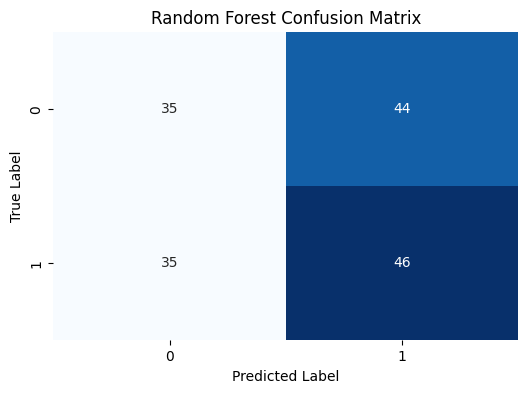


SVM Performance:
Accuracy: 0.4625
ROC AUC: 0.4604
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.29      0.35        79
           1       0.48      0.63      0.54        81

    accuracy                           0.46       160
   macro avg       0.46      0.46      0.45       160
weighted avg       0.46      0.46      0.45       160



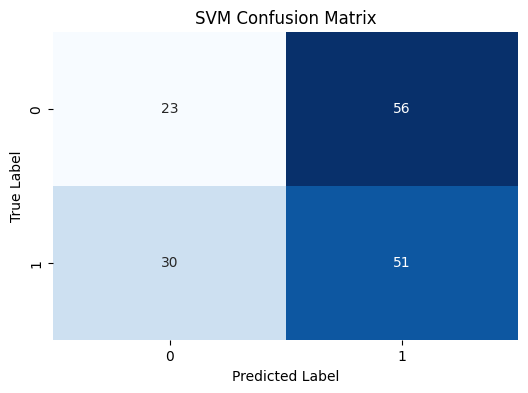

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:42:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.4750
ROC AUC: 0.4744
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        79
           1       0.48      0.52      0.50        81

    accuracy                           0.47       160
   macro avg       0.47      0.47      0.47       160
weighted avg       0.47      0.47      0.47       160



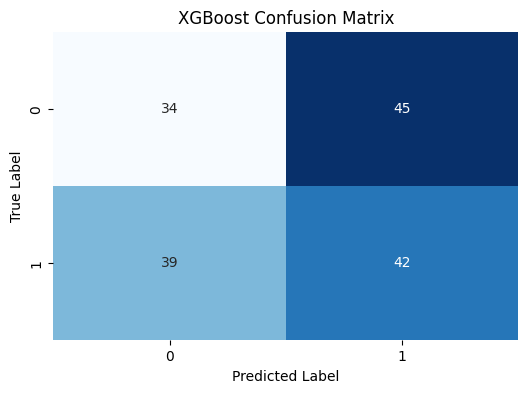


Logistic Regression Performance:
Accuracy: 0.4437
ROC AUC: 0.4434
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.42      0.43        79
           1       0.45      0.47      0.46        81

    accuracy                           0.44       160
   macro avg       0.44      0.44      0.44       160
weighted avg       0.44      0.44      0.44       160



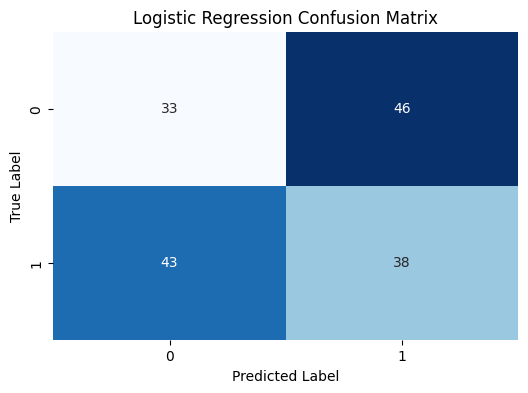


Consensus Model Performance:
Accuracy: 0.4625
ROC AUC: 0.4627
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.48      0.47        79
           1       0.47      0.44      0.46        81

    accuracy                           0.46       160
   macro avg       0.46      0.46      0.46       160
weighted avg       0.46      0.46      0.46       160



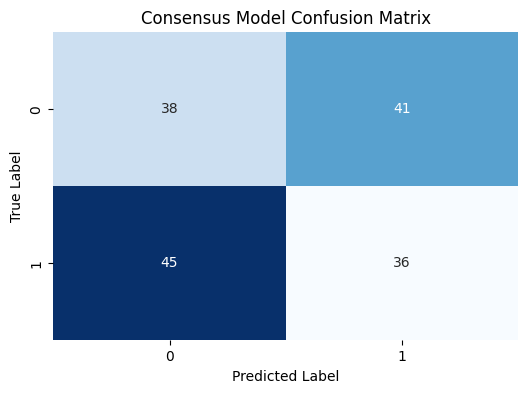


Percentage of predictions where all models agree: 40.62%


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

features_path = 'processed_data_labeled.xlsx'  
labels_path = 'labels.csv'           
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_df = pd.read_csv(labels_path)

X = features_df.values
y = labels_df.values.ravel()

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42)
}

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

predictions = {}
model_performances = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred
    
    model_acc = accuracy_score(y_test, y_pred)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    model_report = classification_report(y_test, y_pred)
    model_confusion_matrix = confusion_matrix(y_test, y_pred)
    
    model_performances[name] = {
        'accuracy': model_acc,
        'roc_auc': model_roc_auc,
        'classification_report': model_report,
        'confusion_matrix': model_confusion_matrix
    }
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {model_acc:.4f}")
    print(f"ROC AUC: {model_roc_auc:.4f}")
    print(f"Classification Report:\n{model_report}")
    
    # Plot confusion matrix
    plot_confusion_matrix(model_confusion_matrix, title=f"{name} Confusion Matrix")

stacked_predictions = np.vstack([predictions[name] for name in models.keys()]).T

consensus_pred = stats.mode(stacked_predictions, axis=1)[0].ravel()

consensus_accuracy = accuracy_score(y_test, consensus_pred)
consensus_roc_auc = roc_auc_score(y_test, consensus_pred)
consensus_report = classification_report(y_test, consensus_pred)
consensus_confusion_matrix = confusion_matrix(y_test, consensus_pred)

print("\nConsensus Model Performance:")
print(f"Accuracy: {consensus_accuracy:.4f}")
print(f"ROC AUC: {consensus_roc_auc:.4f}")
print(f"Classification Report:\n{consensus_report}")

plot_confusion_matrix(consensus_confusion_matrix, title="Consensus Model Confusion Matrix")

agreement_mask = (stacked_predictions == stacked_predictions[:, 0:1]).all(axis=1)
agreement_percentage = (agreement_mask.sum() / len(agreement_mask)) * 100

print(f"\nPercentage of predictions where all models agree: {agreement_percentage:.2f}%")
correlation_matrix = features_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5],
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10],
    }
}

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42)
}

tuned_models = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Tuned Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

estimators = [(name, model) for name, model in tuned_models.items()]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)
print("\nStacking Ensemble Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacking):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_stacking):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_stacking)}")


Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best parameters for SVM: {'classifier__C': 1, 'classifier__kernel': 'linear'}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:44:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best parameters for Logistic Regression: {'classifier__C': 1}

Random Forest Tuned Performance:
Accuracy: 0.5250
ROC AUC: 0.5240
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.44      0.48        79
           1       0.53      0.60      0.56        81

    accuracy                           0.53       160
   macro avg       0.52      0.52      0.52       160
weighted avg       0.52      0.53      0.52       160


SVM Tuned Performance:
Accuracy: 0.4688
ROC AUC: 0.4677
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        79
           1       0.48      0.56      0.51        81

    accuracy                           0.47       160
   macro avg       0.47      0.47      0.46       160
weighted avg       0.47      0.47      0.46

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:45:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin


Stacking Ensemble Performance:
Accuracy: 0.4437
ROC AUC: 0.4419
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.29      0.34        79
           1       0.46      0.59      0.52        81

    accuracy                           0.44       160
   macro avg       0.44      0.44      0.43       160
weighted avg       0.44      0.44      0.43       160



In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load Data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
labels_path = 'labels.csv'  # Update path if necessary
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_df = pd.read_csv(labels_path)

# Prepare Features and Labels
X = features_df.values
y = labels_df.values.ravel()

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Feature Engineering: Scaling and Polynomial Features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Hyperparameter Tuning
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5],
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200], 
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1],
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1],
    }
}

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42)
}

# Train each model with hyperparameter tuning
tuned_models = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ('classifier', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    tuned_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate tuned models
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Tuned Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Weighted Voting Ensemble
weighted_ensemble = VotingClassifier(
    estimators=[
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['SVM']),
        ('xgb', tuned_models['XGBoost']),
        ('lr', tuned_models['Logistic Regression'])
    ],
    voting='soft',
    weights=[2, 1, 2, 1]  # Assign higher weights to better-performing models
)

weighted_ensemble.fit(X_train, y_train)
y_pred_weighted = weighted_ensemble.predict(X_test)

# Evaluate Weighted Voting Ensemble
accuracy = accuracy_score(y_test, y_pred_weighted)
roc_auc = roc_auc_score(y_test, y_pred_weighted)
report = classification_report(y_test, y_pred_weighted)

print("\nWeighted Voting Ensemble Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")

# Blending Ensemble: Averaging Predictions
# Get soft predictions (probabilities) and average them
probs_rf = tuned_models['Random Forest'].predict_proba(X_test)[:, 1]
probs_svm = tuned_models['SVM'].predict_proba(X_test)[:, 1]
probs_xgb = tuned_models['XGBoost'].predict_proba(X_test)[:, 1]
probs_lr = tuned_models['Logistic Regression'].predict_proba(X_test)[:, 1]

# Blending by averaging probabilities with weights
average_probs = (2 * probs_rf + 1 * probs_svm + 2 * probs_xgb + 1 * probs_lr) / 6
y_pred_blend = (average_probs > 0.5).astype(int)

# Evaluate Blending Ensemble
accuracy_blend = accuracy_score(y_test, y_pred_blend)
roc_auc_blend = roc_auc_score(y_test, y_pred_blend)
report_blend = classification_report(y_test, y_pred_blend)

print("\nBlending Ensemble Performance (Averaging Probabilities):")
print(f"Accuracy: {accuracy_blend:.4f}")
print(f"ROC AUC: {roc_auc_blend:.4f}")
print(f"Classification Report:\n{report_blend}")


Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


KeyboardInterrupt: 

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load Data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
labels_path = 'labels.csv'  # Update path if necessary
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_df = pd.read_csv(labels_path)

# Prepare Features and Labels
X = features_df.values
y = labels_df.values.ravel()

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Feature Engineering: Scaling and Polynomial Features (reduced degree for speed)
scaler = StandardScaler()
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)  # Simplified to avoid too many features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define Hyperparameter Grids for Randomized Search (reduced for speed)
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5],
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear'],  # Using linear kernel for faster computation
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],  # Reduced number of estimators for speed
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1],
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1],
    }
}

# Define Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train each model with hyperparameter tuning using RandomizedSearchCV
tuned_models = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)),
        ('classifier', model)
    ])
    
    # Randomized Search for faster tuning
    random_search = RandomizedSearchCV(pipeline, param_grids[name], cv=3, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    tuned_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")

# Evaluate tuned models
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Tuned Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__max_depth': None}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'classifier__kernel': 'linear', 'classifier__C': 1}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:10:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'classifier__n_estimators': 50, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'classifier__C': 1}

Random Forest Tuned Performance:
Accuracy: 0.5062
ROC AUC: 0.5055
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        79
           1       0.51      0.57      0.54        81

    accuracy                           0.51       160
   macro avg       0.51      0.51      0.50       160
weighted avg       0.51      0.51      0.50       160


SVM Tuned Performance:
Accuracy: 0.4688
ROC AUC: 0.4677
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        79
           1       0.48      0.56      0.51        81

    accuracy                           0.47       160
   macro avg       0.47      0.47      0.46       160
weighted avg       0.47      0.47      0.46       160


XGBoost Tuned Performance:
Accuracy: 0.5250
ROC AUC: 0.5234
Classification Report:
              precision    rec

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load Data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
labels_path = 'labels.csv'  # Update path if necessary
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_df = pd.read_csv(labels_path)

# Prepare Features and Labels
X = features_df.values
y = labels_df.values.ravel()

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Feature Engineering: Scaling and Polynomial Features (reduced degree for speed)
scaler = StandardScaler()
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)  # Simplified to avoid too many features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define Hyperparameter Grids for Randomized Search (reduced for speed)
param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5],
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear'],  # Using linear kernel for faster computation
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],  # Reduced number of estimators for speed
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.01, 0.1],
    },
    'Logistic Regression': {
        'classifier__C': [0.1, 1],
    }
}

# Define Models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train each model with hyperparameter tuning using RandomizedSearchCV
tuned_models = {}
predictions = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)),
        ('classifier', model)
    ])
    
    # Randomized Search for faster tuning
    random_search = RandomizedSearchCV(pipeline, param_grids[name], cv=3, n_iter=10, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    tuned_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    
    # Store predictions for each model
    predictions[name] = random_search.best_estimator_.predict(X_test)

# Evaluate tuned models
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Tuned Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Calculate the percentage of predictions where all models agree
pred_matrix = np.column_stack([predictions[name] for name in models.keys()])
agreement_mask = (pred_matrix == pred_matrix[:, 0].reshape(-1, 1)).all(axis=1)
agreement_percentage = np.mean(agreement_mask) * 100

print(f"\nPercentage of predictions where all models agree: {agreement_percentage:.2f}%")

# Weighted Voting Ensemble
# Assign higher weights to better-performing models if known or start with equal weights.
weighted_ensemble = VotingClassifier(
    estimators=[
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['SVM']),
        ('xgb', tuned_models['XGBoost']),
        ('lr', tuned_models['Logistic Regression'])
    ],
    voting='soft',
    weights=[2, 1, 2, 1]  # Adjust weights as necessary based on individual model performance
)

weighted_ensemble.fit(X_train, y_train)
y_pred_weighted = weighted_ensemble.predict(X_test)

# Evaluate Weighted Voting Ensemble
accuracy = accuracy_score(y_test, y_pred_weighted)
roc_auc = roc_auc_score(y_test, y_pred_weighted)
report = classification_report(y_test, y_pred_weighted)

print("\nWeighted Voting Ensemble Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__max_depth': None}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'classifier__kernel': 'linear', 'classifier__C': 1}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'classifier__n_estimators': 50, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression: {'classifier__C': 1}

Random Forest Tuned Performance:
Accuracy: 0.5062
ROC AUC: 0.5055
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        79
           1       0.51      0.57      0.54        81

    accuracy                           0.51       160
   macro avg       0.51      0.51      0.50       160
weighted avg       0.51      0.51      0.50       160


SVM Tuned Performance:
Accuracy: 0.4688
ROC AUC: 0.4677
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41        79
           1       0.48      0.56      0.51        81

    accuracy                           0.47       160
   macro avg       0.47      0.47      0.46       160
weighted avg       0.47      0.47      0.46       160


XGBoost Tuned Performance:
Accuracy: 0.5250
ROC AUC: 0.5234
Classification Report:
              precision    rec

C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Weighted Voting Ensemble Performance:
Accuracy: 0.4813
ROC AUC: 0.4800
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42        79
           1       0.49      0.58      0.53        81

    accuracy                           0.48       160
   macro avg       0.48      0.48      0.48       160
weighted avg       0.48      0.48      0.48       160



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer

# Load Data
features_path = 'processed_data_labeled.xlsx'  # Update path if necessary
labels_path = 'labels.csv'  
features_df = pd.read_excel(features_path, sheet_name='Features')
labels_df = pd.read_csv(labels_path)

X = features_df.values
y = labels_df.values.ravel()

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
poly = PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)  
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


param_grids = {
    'Random Forest': {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10],
        'classifier__min_samples_split': [2, 5],
    },
    'SVM': {
        'classifier__C': [0.1, 1],
        'classifier__kernel': ['linear'],  
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100],  
        'classifier__max_depth': [3, 5],
        'classifier__learning_rate': [0.1],
    },
    'Logistic Regression': {
        'classifier__C': [1],
    }
}

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),  
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

tuned_models = {}
predictions = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=1, interaction_only=True, include_bias=False)),
        ('classifier', model)
    ])
    
    n_iter = min(10, len(param_grids[name]))  
    random_search = RandomizedSearchCV(pipeline, param_grids[name], cv=3, n_iter=n_iter, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    tuned_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    
    predictions[name] = random_search.best_estimator_.predict(X_test)

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Tuned Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

pred_matrix = np.column_stack([predictions[name] for name in models.keys()])
agreement_mask = (pred_matrix == pred_matrix[:, 0].reshape(-1, 1)).all(axis=1)
agreement_percentage = np.mean(agreement_mask) * 100

print(f"\nPercentage of predictions where all models agree: {agreement_percentage:.2f}%")

weighted_ensemble = VotingClassifier(
    estimators=[
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['SVM']),
        ('xgb', tuned_models['XGBoost']),
        ('lr', tuned_models['Logistic Regression'])
    ],
    voting='soft',
    weights=[2, 1, 2, 1]  
)

weighted_ensemble.fit(X_train, y_train)
y_pred_weighted = weighted_ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_weighted)
roc_auc = roc_auc_score(y_test, y_pred_weighted)
report = classification_report(y_test, y_pred_weighted)

print("\nWeighted Voting Ensemble Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Classification Report:\n{report}")


Best parameters for Random Forest: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__max_depth': None}
Best parameters for SVM: {'classifier__kernel': 'linear', 'classifier__C': 1}
Best parameters for XGBoost: {'classifier__n_estimators': 50, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}
Best parameters for Logistic Regression: {'classifier__C': 1}

Random Forest Tuned Performance:
Accuracy: 0.5062
ROC AUC: 0.5055
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47        79
           1       0.51      0.57      0.54        81

    accuracy                           0.51       160
   macro avg       0.51      0.51      0.50       160
weighted avg       0.51      0.51      0.50       160


SVM Tuned Performance:
Accuracy: 0.4688
ROC AUC: 0.4677
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.38      0.41     

In [ ]:
from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['SVM']),
        ('xgb', tuned_models['XGBoost']),
        ('lr', tuned_models['Logistic Regression'])
    ],
    final_estimator=LogisticRegression()  
)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print("\nStacking Ensemble Performance:")
print(f"Accuracy: {accuracy_stacking:.4f}")
print(f"ROC AUC: {roc_auc_stacking:.4f}")
print(f"Classification Report:\n{report_stacking}")



Stacking Ensemble Performance:
Accuracy: 0.4688
ROC AUC: 0.4669
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.32      0.37        79
           1       0.48      0.62      0.54        81

    accuracy                           0.47       160
   macro avg       0.46      0.47      0.46       160
weighted avg       0.46      0.47      0.46       160



In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost with GPU support
xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.4625


In [24]:
# Import necessary libraries
import xgboost as xgb
import faiss
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume data is loaded into X_train, X_test, y_train, y_test

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to float32 for GPU compatibility (required by FAISS and TensorFlow)
X_train_f32 = X_train_scaled.astype('float32')
X_test_f32 = X_test_scaled.astype('float32')


# XGBoost Model with GPU support
print("Training XGBoost on GPU...")
xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)


# FAISS-based KNN Model with GPU support
print("Training KNN using FAISS on GPU...")
d = X_train_f32.shape[1]  # Number of features
k = 5  # Number of nearest neighbors
index = faiss.IndexFlatL2(d)
res = faiss.StandardGpuResources()  # Initialize GPU resources
gpu_index = faiss.index_cpu_to_gpu(res, 0, index)
gpu_index.add(X_train_f32)

# Perform KNN search on test data
_, indices = gpu_index.search(X_test_f32, k)
y_pred_faiss_knn = np.array([np.bincount(y_train[neighbor_indices]).argmax() for neighbor_indices in indices])
faiss_knn_accuracy = accuracy_score(y_test, y_pred_faiss_knn)
print("FAISS KNN Accuracy:", faiss_knn_accuracy)


# Neural Network Model with TensorFlow on GPU
print("Training Neural Network on GPU...")
tf.keras.backend.clear_session()  # Clear any previous models from memory

# Define neural network architecture
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_f32.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
nn_model.fit(X_train_f32, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate neural network
loss, nn_accuracy = nn_model.evaluate(X_test_f32, y_test)
print("Neural Network Accuracy:", nn_accuracy)


ModuleNotFoundError: No module named 'faiss'

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_f32 = X_train_scaled.astype('float32')
X_test_f32 = X_test_scaled.astype('float32')


print("Training XGBoost on GPU...")
xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)

print("Training KNN on CPU...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("Training Neural Network on GPU...")
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_f32.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_f32, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss, nn_accuracy = nn_model.evaluate(X_test_f32, y_test)
print("Neural Network Accuracy:", nn_accuracy)



Training XGBoost on GPU...
XGBoost Accuracy: 0.4625
Training KNN on CPU...
KNN Accuracy: 0.45625
Training Neural Network on GPU...


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^



Epoch 1/20


16/16 [==============================] - 1s 13ms/step - loss: 0.7426 - accuracy: 0.5469 - val_loss: 0.7700 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.5859 - val_loss: 0.7706 - val_accuracy: 0.4531
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6303 - accuracy: 0.6387 - val_loss: 0.8178 - val_accuracy: 0.4844
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6641 - val_loss: 0.8425 - val_accuracy: 0.4375
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6543 - val_loss: 0.8030 - val_accuracy: 0.4688
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7188 - val_loss: 0.9204 - val_accuracy: 0.4531
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7246 - val_loss: 0.8843 - val_accuracy: 0.4922
Epoch 8/20
16/1

In [ ]:
# Import necessary libraries
import xgboost as xgb
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_f32 = X_train_scaled.astype('float32')
X_test_f32 = X_test_scaled.astype('float32')


xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100]
}

xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Best XGBoost Accuracy:", xgb_accuracy)


knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Best KNN Accuracy:", knn_accuracy)


def create_nn_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_f32.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(build_fn=create_nn_model, epochs=20, batch_size=32, verbose=0)

nn_param_grid = {
    'epochs': [20, 50],
    'batch_size': [16, 32]
}
nn_grid = GridSearchCV(nn_model, nn_param_grid, cv=3, scoring='accuracy')
nn_grid.fit(X_train_f32, y_train)
best_nn = nn_grid.best_estimator_

y_pred_nn = best_nn.predict(X_test_f32)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Best Neural Network Accuracy:", nn_accuracy)


ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('knn', best_knn),
    ('nn', best_nn)
], voting='soft')  # Use 'soft' voting to consider probabilities

ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", ensemble_accuracy)


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [2]:
%pip install scikeras

  Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-win_amd64.whl (11.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\kshit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Import necessary libraries
import xgboost as xgb
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_f32 = X_train_scaled.astype('float32')
X_test_f32 = X_test_scaled.astype('float32')

xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100]
}

xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Best XGBoost Accuracy:", xgb_accuracy)


knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Best KNN Accuracy:", knn_accuracy)


def create_nn_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_f32.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = KerasClassifier(model=create_nn_model, epochs=20, batch_size=32, verbose=0)

nn_param_grid = {
    'epochs': [20, 50],
    'batch_size': [16, 32]
}
nn_grid = GridSearchCV(nn_model, nn_param_grid, cv=3, scoring='accuracy')
nn_grid.fit(X_train_f32, y_train)
best_nn = nn_grid.best_estimator_

y_pred_nn = best_nn.predict(X_test_f32)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print("Best Neural Network Accuracy:", nn_accuracy)


ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('knn', best_knn),
    ('nn', best_nn)
], voting='soft') 

ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Best XGBoost Accuracy: 0.4625
Best KNN Accuracy: 0.4875
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kshit\AppData\Local\Temp\ipykernel_25388\3600245525.py", line 80, in <module>
    nn_grid.fit(X_train_f32, y_train)
  File "C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    :class:`~sklearn.decomposition.PCA` outputs 3 features, then the generated feature
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py", line 898, in fit
    `n_features` is the number of fe

In [34]:
# Import necessary libraries
import xgboost as xgb
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

# Assume data is loaded into X_train, X_test, y_train, y_test

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to float32 for GPU compatibility (required by TensorFlow)
X_train_f32 = X_train_scaled.astype('float32')
X_test_f32 = X_test_scaled.astype('float32')


# XGBoost with Hyperparameter Tuning
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100]
}

xgb_model = xgb.XGBClassifier(tree_method="hist", device="cuda", eval_metric="logloss")
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', error_score='raise')
xgb_grid.fit(X_train_scaled, y_train)
best_xgb = xgb_grid.best_estimator_

y_pred_xgb = best_xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Best XGBoost Accuracy:", xgb_accuracy)


# KNN with Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy', error_score='raise')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Best KNN Accuracy:", knn_accuracy)


# Neural Network without GridSearchCV
print("Training Neural Network on GPU...")
tf.keras.backend.clear_session()  # Clear any previous models from memory

# Define a basic neural network model
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_f32.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the neural network
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
nn_model.fit(X_train_f32, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the neural network
loss, nn_accuracy = nn_model.evaluate(X_test_f32, y_test)
print("Neural Network Accuracy:", nn_accuracy)


# Ensemble Model with Majority Voting
ensemble_model = VotingClassifier(estimators=[
    ('xgb', best_xgb),
    ('knn', best_knn),
], voting='soft')  # Exclude neural network for simplicity

ensemble_model.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble_model.predict(X_test_scaled)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", ensemble_accuracy)


unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in y_train:", class_distribution)


Best XGBoost Accuracy: 0.4625
Best KNN Accuracy: 0.4875
Training Neural Network on GPU...
Epoch 1/20
16/16 [==============================] - 1s 10ms/step - loss: 0.7916 - accuracy: 0.4590 - val_loss: 0.7308 - val_accuracy: 0.4766
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5703 - val_loss: 0.7726 - val_accuracy: 0.4844
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6543 - accuracy: 0.6152 - val_loss: 0.8025 - val_accuracy: 0.4453
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6517 - accuracy: 0.6426 - val_loss: 0.8044 - val_accuracy: 0.4766
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6165 - accuracy: 0.6484 - val_loss: 0.8048 - val_accuracy: 0.4609
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6836 - val_loss: 0.8530 - val_accuracy: 0.4531
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - los

In [38]:
%pip uninstall -y scikit-learn imbalanced-learn


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
Found existing installation: imbalanced-learn 0.12.4
Uninstalling imbalanced-learn-0.12.4:
  Successfully uninstalled imbalanced-learn-0.12.4
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


In [39]:
%pip install scikit-learn==1.0.2 imbalanced-learn==0.9.1


     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
      --------------------------------------- 0.2/6.7 MB 2.4 MB/s eta 0:00:03
     --- ------------------------------------ 0.7/6.7 MB 6.0 MB/s eta 0:00:02
     ------- -------------------------------- 1.2/6.7 MB 7.4 MB/s eta 0:00:01
     ---------- ----------------------------- 1.7/6.7 MB 8.4 MB/s eta 0:00:01
     ------------- -------------------------- 2.3/6.7 MB 9.0 MB/s eta 0:00:01
     ---------------- ----------------------- 2.8/6.7 MB 9.4 MB/s eta 0:00:01
     -------------------- ------------------- 3.4/6.7 MB 9.8 MB/s eta 0:00:01
     ----------------------- ---------------- 3.9/6.7 MB 10.0 MB/s eta 0:00:01
     -------------------------- ------------- 4.5/6.7 MB 10.1 MB/s eta 0:00:01
     ----------------------------- ---------- 5.0/6.7 MB 10.3 MB/s eta 0:00:01
     ------------------------------- -------- 5.2/6.7 MB 10.5 MB/s eta 0:00

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1788 lines of output]
      Partial import of sklearn during the build process.
      setup.py:128: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command.build_ext import build_ext  # noqa
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      INFO: C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.40.33807\bin\HostX86\x64\cl.exe /c /nologo /O2 /W3 /GL /DNDEB

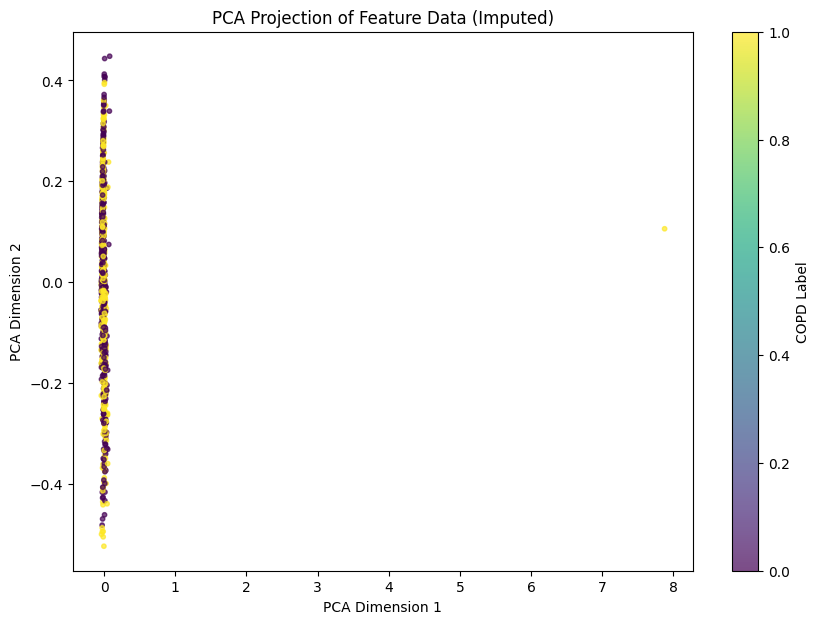

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load data
labels_df = pd.read_csv('labels.csv')
processed_data_df = pd.read_excel('processed_data_labeled.xlsx')

# Extract feature data and labels
feature_data = processed_data_df.values
labels = labels_df['COPD'].values

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
feature_data_imputed = imputer.fit_transform(feature_data)

# Perform PCA for 2D projection
pca = PCA(n_components=2, random_state=42)
pca_embedding = pca.fit_transform(feature_data_imputed)

# Plotting the PCA result with labels
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(scatter, label='COPD Label')
plt.title('PCA Projection of Feature Data (Imputed)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()


In [3]:
%pip install umap-learn


  Using cached umap_learn-0.5.7-py3-none-any.whl.metadata (21 kB)
  Using cached numba-0.60.0-cp311-cp311-win_amd64.whl.metadata (2.8 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
Using cached numba-0.60.0-cp311-cp311-win_amd64.whl (2.7 MB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.1 MB 495.5 kB/s eta 0:00:57
   ---------------------------------------- 0.1/28.1 MB 1.2 MB/s eta 0:00:23
   - -------------------------------------- 1.0/28.1 MB 7.1 MB/s eta 0:00:04
   --- ------------------------------------ 2.3/28.1 MB 11.3 MB/s eta 0:00:03
   --- ------------------------------------ 2.8/28.1 MB 12.7 MB/s eta 0:00:02
   ---- --------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\kshit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/88.8 kB ? eta -:--:--
   --------------------------- ------------ 61.4/88.8 kB 550.5 kB/s eta 0:00:01
   ---------------------------------------- 88.8/88.8 kB 720.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
    --------------------------------------- 0.0/2.7 MB 2.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.7 MB 3.6 MB/s eta 0:00:01
   --- ------------------------------------ 0.2/2.7 MB 3.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 1.9 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.7 MB 2.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.7 MB 1.8 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.7 MB 1.9 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.7 MB 1.9 MB/s eta 0:00:02
   --------- ---------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\kshit\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\kshit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


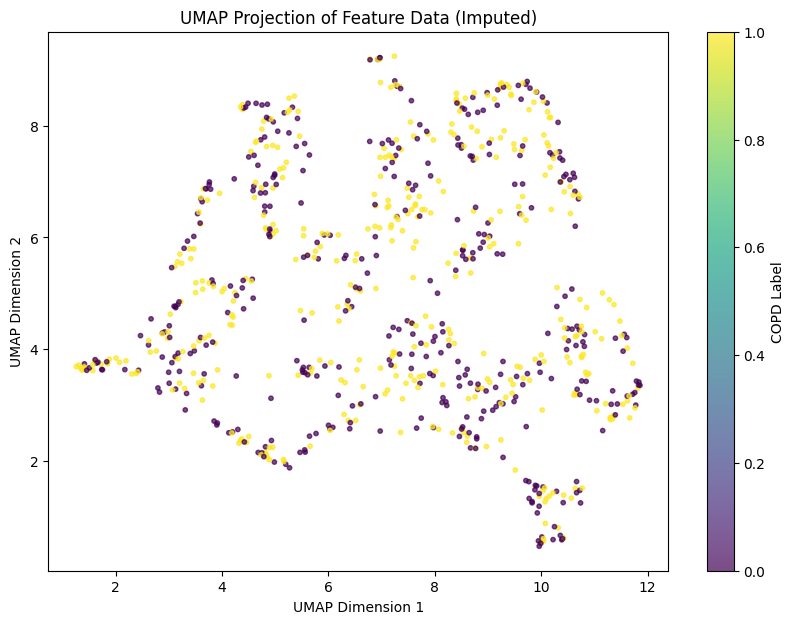

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from umap import UMAP

labels_df = pd.read_csv('labels.csv')
processed_data_df = pd.read_excel('processed_data_labeled.xlsx')

feature_data = processed_data_df.values
labels = labels_df['COPD'].values

imputer = SimpleImputer(strategy='mean')
feature_data_imputed = imputer.fit_transform(feature_data)

umap = UMAP(n_components=2, random_state=42)
umap_embedding = umap.fit_transform(feature_data_imputed)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
plt.colorbar(scatter, label='COPD Label')
plt.title('UMAP Projection of Feature Data (Imputed)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
